# Lesson 2: Deploy a model

A notebook based on Lesson 2 of the Fast AI course.

In this notebook, we will deploy our model from the previous lesson using Gradio.
First deploy locally, then to Huggingface Spaces

In [1]:
from pathlib import Path

from fastai.vision.all import load_learner, PILImage
import gradio as gr

/home/gurp/miniconda3/envs/ml-practice/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 1. Create the predict function
Load the learner to use for predictions.

In [2]:
learner = load_learner('vw_image_model.pkl')
labels = learner.dls.vocab

def predict(img):
    "dict: Predict the classification of an image an return in the format required by Gradio."
    img = PILImage.create(img)
    pred_label, pred_idx, probs = learner.predict(img)
    return dict(zip(labels, map(float, probs)))
    

## 2. Test the predict function

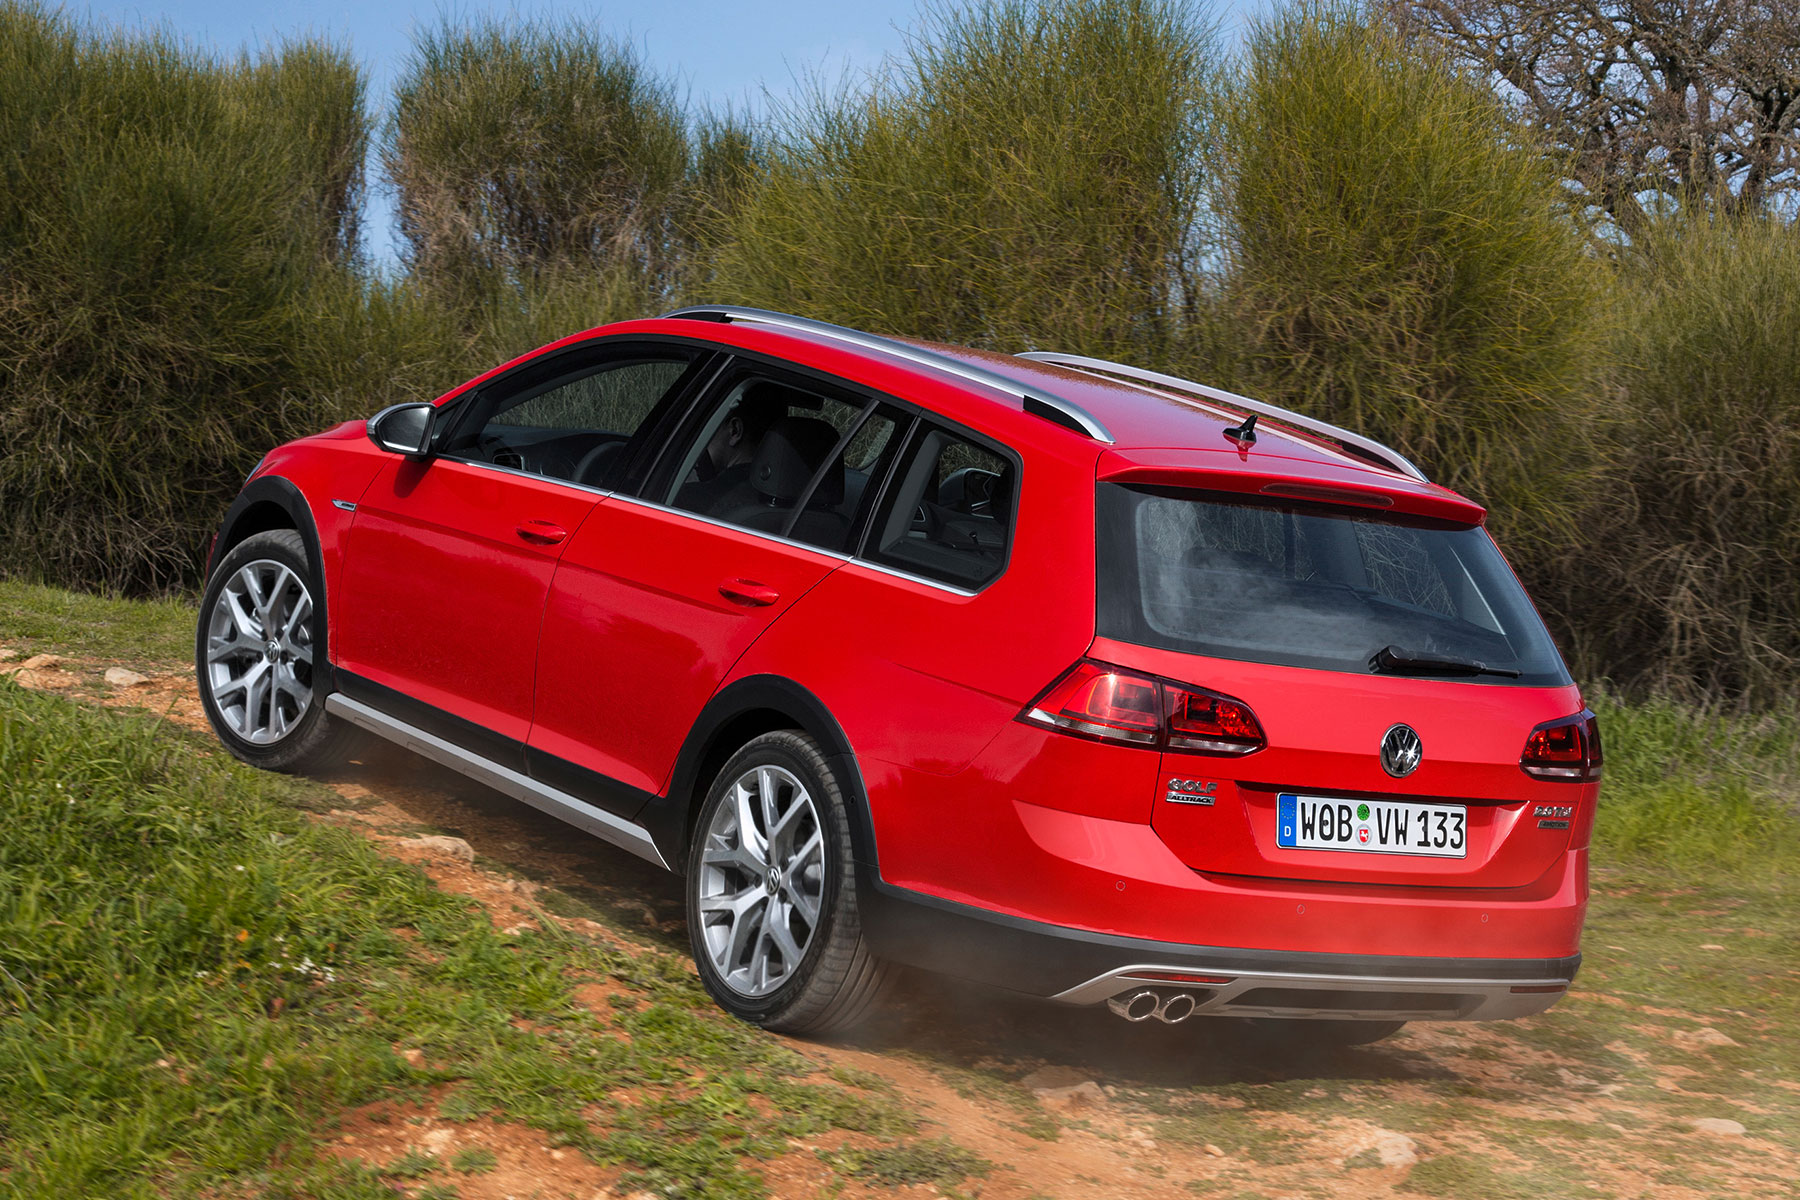

In [3]:
IMAGE_FPATH = Path().absolute().parents[1] / 'datasets' / 'fastai' / 'lesson1'
test_destination_path = IMAGE_FPATH.parent / 'test_images'
test_img = PILImage.create(test_destination_path.ls()[2])
test_img

In [4]:
PILImage.create(Path().absolute() / 'VW.jpg')

UnidentifiedImageError: cannot identify image file '/home/gurp/workspace/ml-practice/ml-practice/notebooks/fastai/VW.jpg'

In [4]:
pred_label, pred_idx, probs = learner.predict(test_img)
print(pred_label, pred_idx, probs)

volkswagen_golf tensor(1) tensor([0.0790, 0.9210])


## 3. Create the Gradio interface

In [6]:
title = "Car Classifier"
description = """
It has often been said (by me) that the Volkswagen Golf is the Rolls Royce of automobiles.
This model attempts the lofty task of distinguishing Volkswagen Golfs from Rolls Royces.
Created as a demo for Gradio and HuggingFace Spaces.
"""
examples = ['VW.jpg', 'RR.jpg']
# interpretation='default'
enable_queue=True

gr.Interface(
    fn=predict,
    inputs=gr.inputs.Image(shape=(400, 400)),
    outputs=gr.outputs.Label(),
    title=title,
    description=description,
    examples=examples,
    # interpretation=interpretation,
    enable_queue=enable_queue
).launch()

/tmp/ipykernel_119486/235953362.py:13: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  inputs=gr.inputs.Image(shape=(400, 400)),
/tmp/ipykernel_119486/235953362.py:13: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  inputs=gr.inputs.Image(shape=(400, 400)),
/tmp/ipykernel_119486/235953362.py:14: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  outputs=gr.outputs.Label(),
/tmp/ipykernel_119486/235953362.py:14: GradioUnusedKwargWarning: You have unused kwarg parameters in Label, please remove them: {'type': 'auto'}
  outputs=gr.outputs.Label(),
/tmp/ipykernel_119486/235953362.py:11: GradioDeprecationWarning: `enable_queue` is deprecated in `Interface()`, please use it within `launch()` instead.
  gr.Interface(


Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "/home/gurp/miniconda3/envs/ml-practice/lib/python3.11/site-packages/PIL/Image.py", line 3240, in open
    fp.seek(0)
    ^^^^^^^
AttributeError: 'NoneType' object has no attribute 'seek'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/gurp/miniconda3/envs/ml-practice/lib/python3.11/site-packages/gradio/routes.py", line 523, in run_predict
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/gurp/miniconda3/envs/ml-practice/lib/python3.11/site-packages/gradio/blocks.py", line 1437, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/gurp/miniconda3/envs/ml-practice/lib/python3.11/site-packages/gradio/blocks.py", line 1109, in call_function
    prediction = await anyio.to_thread.run_sync(
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/gurp/minicond